In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##### I started my exploratory analysis by uploading the csv with all of the WTA hike data that was returned from our webscraper. I made some formating changes to make the data uniform and easier to work with such as normalizing all the column headers to remove the spaces and make them all lower case. I made the same formatting changes to the region column to make them easier to work with later in the project.

In [11]:
df_hikes = pd.read_csv('wta_hikes.csv')

#format columns
df_hikes.columns = df_hikes.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df_hikes['region'] = df_hikes['region'].str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

df_hikes.head(5)

,title,region,distance,dist_type,gain,highest,rating,rating_count,report_date,report_count,link
0,Wonderland Trail,mount_rainier_area,93.0,roundtrip,22000.0,6750.0,0.00,0,9/15/2018,216,https://www.wta.org/go-hiking/hikes/wonderland...
1,Humpback Mountain,snoqualmie_region,4.0,roundtrip,2500.0,5174.0,4.00,7,6/14/2019,113,https://www.wta.org/go-hiking/hikes/humpback-m...
2,Hummocks Trail,south_cascades,2.4,roundtrip,100.0,2500.0,3.82,17,6/15/2019,91,https://www.wta.org/go-hiking/hikes/hummocks
3,Hurricane Hill,olympic_peninsula,3.2,roundtrip,650.0,5757.0,4.17,18,6/22/2019,186,https://www.wta.org/go-hiking/hikes/hurricane-...
4,Ira Spring Trail - Mason Lake,snoqualmie_region,6.5,roundtrip,2420.0,4320.0,4.18,99,6/30/2019,1361,https://www.wta.org/go-hiking/hikes/ira-spring...


## Hikes by Region

##### Intitially I dove into the region data to get a sense for how we would be able to divide up the data in a logical manner I figured that seperating out our hiking data by region naturally made sense. After putting it into a table I toyed around with some potential visuals and potential visuals that could go well with the viz design later.

In [12]:
# group by region
num_hikes_per_region = df_hikes.groupby(['region'])['title'].count().reset_index(name='count')
num_hikes_per_region.sort_values(by=['count'], ascending=False, inplace=True)

num_hikes_per_region

,region,count
5,north_cascades,401
7,puget_sound_and_islands,299
0,central_cascades,296
8,snoqualmie_region,258
6,olympic_peninsula,256
9,south_cascades,204
4,mount_rainier_area,198
2,eastern_washington,188
10,southwest_washington,157
1,central_washington,118


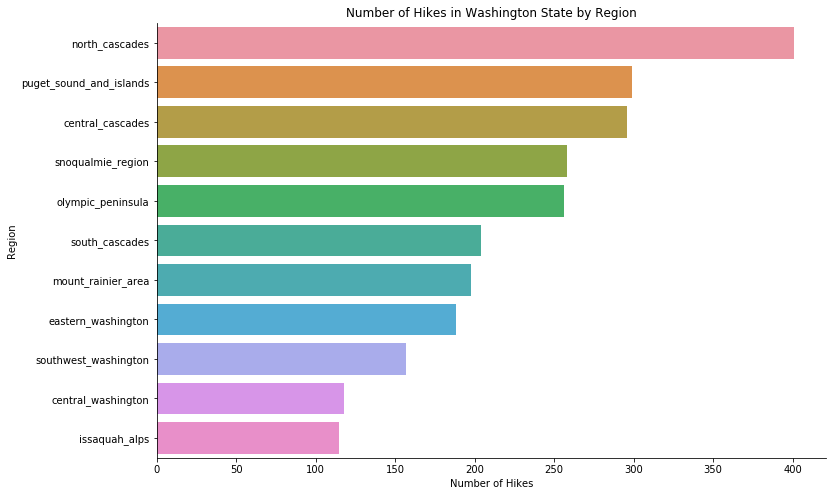

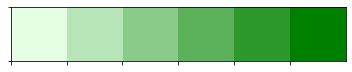

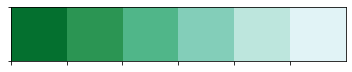

In [4]:
# charting the breakdown of hikes by region
f, ax = plt.subplots(figsize=(12, 8))

sns.barplot(x='count', y='region',data=num_hikes_per_region)
ax.set(xlabel='Number of Hikes', ylabel='Region')
ax.set_title('Number of Hikes in Washington State by Region')
sns.despine()

# Playing around with some ideas for more nature themed color schemes
sns.palplot(sns.light_palette("green"))
sns.palplot(sns.color_palette("BuGn_r"))

## Distribution Analysis

##### From here I began to analyze the distribution of rating counts and report counts. The hypothesis is that the rating/report counts provide some insight into hike popularity. The most frequented hikes are the ones recieving the most feedback. Hypothesizing that a relatively small amount of hikes are collecting disproportionitly higher amounts of reports and ratings, while hikes recieving an average to low amount of feedback are often being over looked not due to merit but due to this disproportionate popularity.

In [5]:
df_hikes.sort_values('rating_count', ascending=False, inplace=True)
df_hikes.head(5)

,title,region,distance,dist_type,gain,highest,rating,rating_count,report_date,report_count,link
1095,Rattlesnake Ledge,snoqualmie_region,4.0,roundtrip,1160.0,2078.0,4.05,310,6/30/2019,1771,https://www.wta.org/go-hiking/hikes/rattle-sna...
1698,Lake Serene,central_cascades,8.2,roundtrip,2000.0,2521.0,4.46,297,6/29/2019,1688,https://www.wta.org/go-hiking/hikes/lake-serene
1087,Lake 22,north_cascades,5.4,roundtrip,1350.0,2400.0,4.24,274,6/30/2019,1858,https://www.wta.org/go-hiking/hikes/lake-22-la...
1096,Wallace Falls State Park,central_cascades,5.6,roundtrip,1300.0,1500.0,4.08,236,6/29/2019,1206,https://www.wta.org/go-hiking/hikes/wallace-falls
274,Mount Si,snoqualmie_region,8.0,roundtrip,3150.0,3900.0,4.00,218,6/30/2019,1802,https://www.wta.org/go-hiking/hikes/mount-si


Text(0.5, 1.0, 'Report Count Distro')

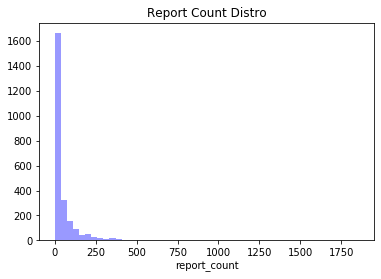

In [6]:
#visualize the distribution on the report counts
sns.distplot(df_hikes['report_count'], kde=False, color="b").set_title('Report Count Distro')

In [7]:
df_hikes['report_count'].describe()

count    2490.000000
mean       64.430924
std       151.755302
min         0.000000
25%         5.000000
50%        17.000000
75%        57.750000
max      1858.000000
Name: report_count, dtype: float64

Text(0.5, 1.0, 'Rating Count Distro')

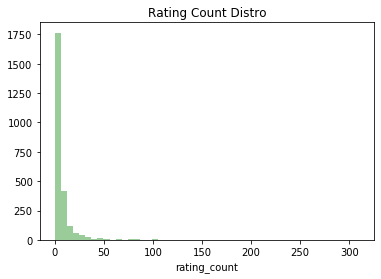

In [8]:
#distribution of number of rating counts
sns.distplot(df_hikes['rating_count'], kde=False, color="g").set_title('Rating Count Distro')

In [9]:
df_hikes['rating_count'].describe()

count    2490.000000
mean        7.765863
std        18.151570
min         0.000000
25%         1.000000
50%         4.000000
75%         7.000000
max       310.000000
Name: rating_count, dtype: float64

In [34]:
regions = df_hikes.region.unique()

def sort_regions(df, region):
    return df[(df['region'] == region) & (df['report_count'] >= 5) & (df['report_count'] <= 57) & (df['rating_count'] >= 1) & (df['rating_count'] <= 7)]

for region in regions:
    exec('{0}_df = sort_regions(df_hikes, region)'.format(region))
    
#each of the 11 regions in this array is a dataframe containing the regions fitting within the interqur 
regions

array(['mount_rainier_area', 'snoqualmie_region', 'south_cascades',
       'olympic_peninsula', 'central_cascades', 'north_cascades',
       'puget_sound_and_islands', 'southwest_washington',
       'central_washington', 'eastern_washington', 'issaquah_alps'],
      dtype=object)

In [37]:
central_washington_df.sort_values('rating', ascending=False)

,title,region,distance,dist_type,gain,highest,rating,rating_count,report_date,report_count,link
26,Horse Lake Reserve,central_washington,5.2,roundtrip,700.0,2410.0,4.50,4,5/25/2019,29,https://www.wta.org/go-hiking/hikes/horse-lake...
1705,Yakima Sportsman State Park,central_washington,2.0,roundtrip,NaN,NaN,4.00,2,5/28/2019,10,https://www.wta.org/go-hiking/hikes/yakima-spo...
1764,Palouse to Cascades Trail - Army West,central_washington,8.0,roundtrip,500.0,NaN,3.80,5,5/5/2018,14,https://www.wta.org/go-hiking/hikes/palouse-to...
1615,Moses Coulee Preserve,central_washington,4.0,roundtrip,NaN,1750.0,3.75,4,4/1/2019,10,https://www.wta.org/go-hiking/hikes/moses-coul...
360,Horan Natural Area,central_washington,2.5,roundtrip,NaN,640.0,3.71,7,5/7/2019,14,https://www.wta.org/go-hiking/hikes/horan-natu...
133,Horse Heaven Hills,central_washington,6.8,roundtrip,1220.0,1924.0,3.57,7,6/24/2019,13,https://www.wta.org/go-hiking/hikes/horse-heav...
2325,Goose Lake Plateau,central_washington,7.0,roundtrip,100.0,1000.0,3.50,4,1/13/2019,12,https://www.wta.org/go-hiking/hikes/goose-lake...
2186,Douglas Creek Canyon - North,central_washington,3.0,roundtrip,100.0,1700.0,3.50,4,6/18/2018,10,https://www.wta.org/go-hiking/hikes/doulgas-cr...
1872,Big Burn Canyon,central_washington,16.0,roundtrip,2850.0,4850.0,3.50,4,10/23/2018,6,https://www.wta.org/go-hiking/hikes/big-burn-c...
1462,Manastash Lake,central_washington,8.0,roundtrip,2100.0,5063.0,3.50,6,6/6/2019,56,https://www.wta.org/go-hiking/hikes/manastash-...
